## Maximum likelihood mapmaking

2025-11-24 21:00:20.672 INFO: Fetching https://github.com/thomaswmorris/maria-data/raw/master/maps/cluster2.fits


Downloading:   0%|                | 0.00/4.20M [00:00<?, ?B/s]

Downloading:  46%|███████▎        | 1.94M/4.20M [00:00<00:00, 19.2MB/s]

Downloading: 100%|████████████████| 4.20M/4.20M [00:00<00:00, 23.9MB/s]

ProjectionMap:
  shape(nu, y, x): (1, 1024, 1024)
  stokes: naive
  nu: [150.] GHz
  t: naive
  z: naive
  quantity: spectral_flux_density_per_pixel
  units: Jy/pixel
    min: -5.777e-04
    max: -1.459e-07
    rms: 7.352e-05
  center:
    ra: 17ʰ20ᵐ0.00ˢ
    dec: -10°00’0.00”
  size(y, x): (1°, 1°)
  resolution(y, x): (3.516”, 3.516”)
  beam(maj, min, rot): [[0. 0. 0.]] rad
  memory: 16.78 MB


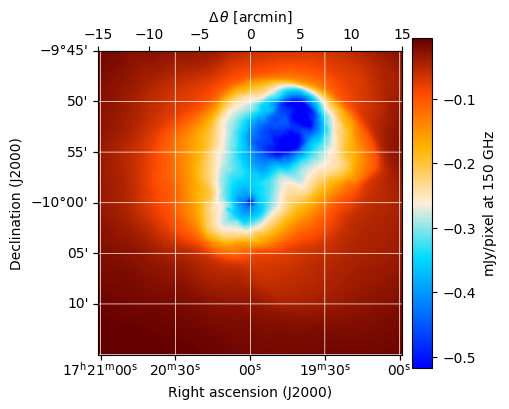

In [1]:
import maria
from maria.io import fetch

input_map = maria.map.load(fetch("maps/cluster2.fits"), nu=150e9)
input_map.data *= 5e1 

input_map[..., 256:-256, 256:-256].plot(cmap="cmb")
print(input_map)

PlanList(1 plans, 900 s):
                           start_time duration   target(ra,dec)     center(az,el)
chunk                                                                            
0      2025-11-25 16:29:25.956 +00:00    900 s  (260°, -9.998°)  (48.37°, 71.36°)


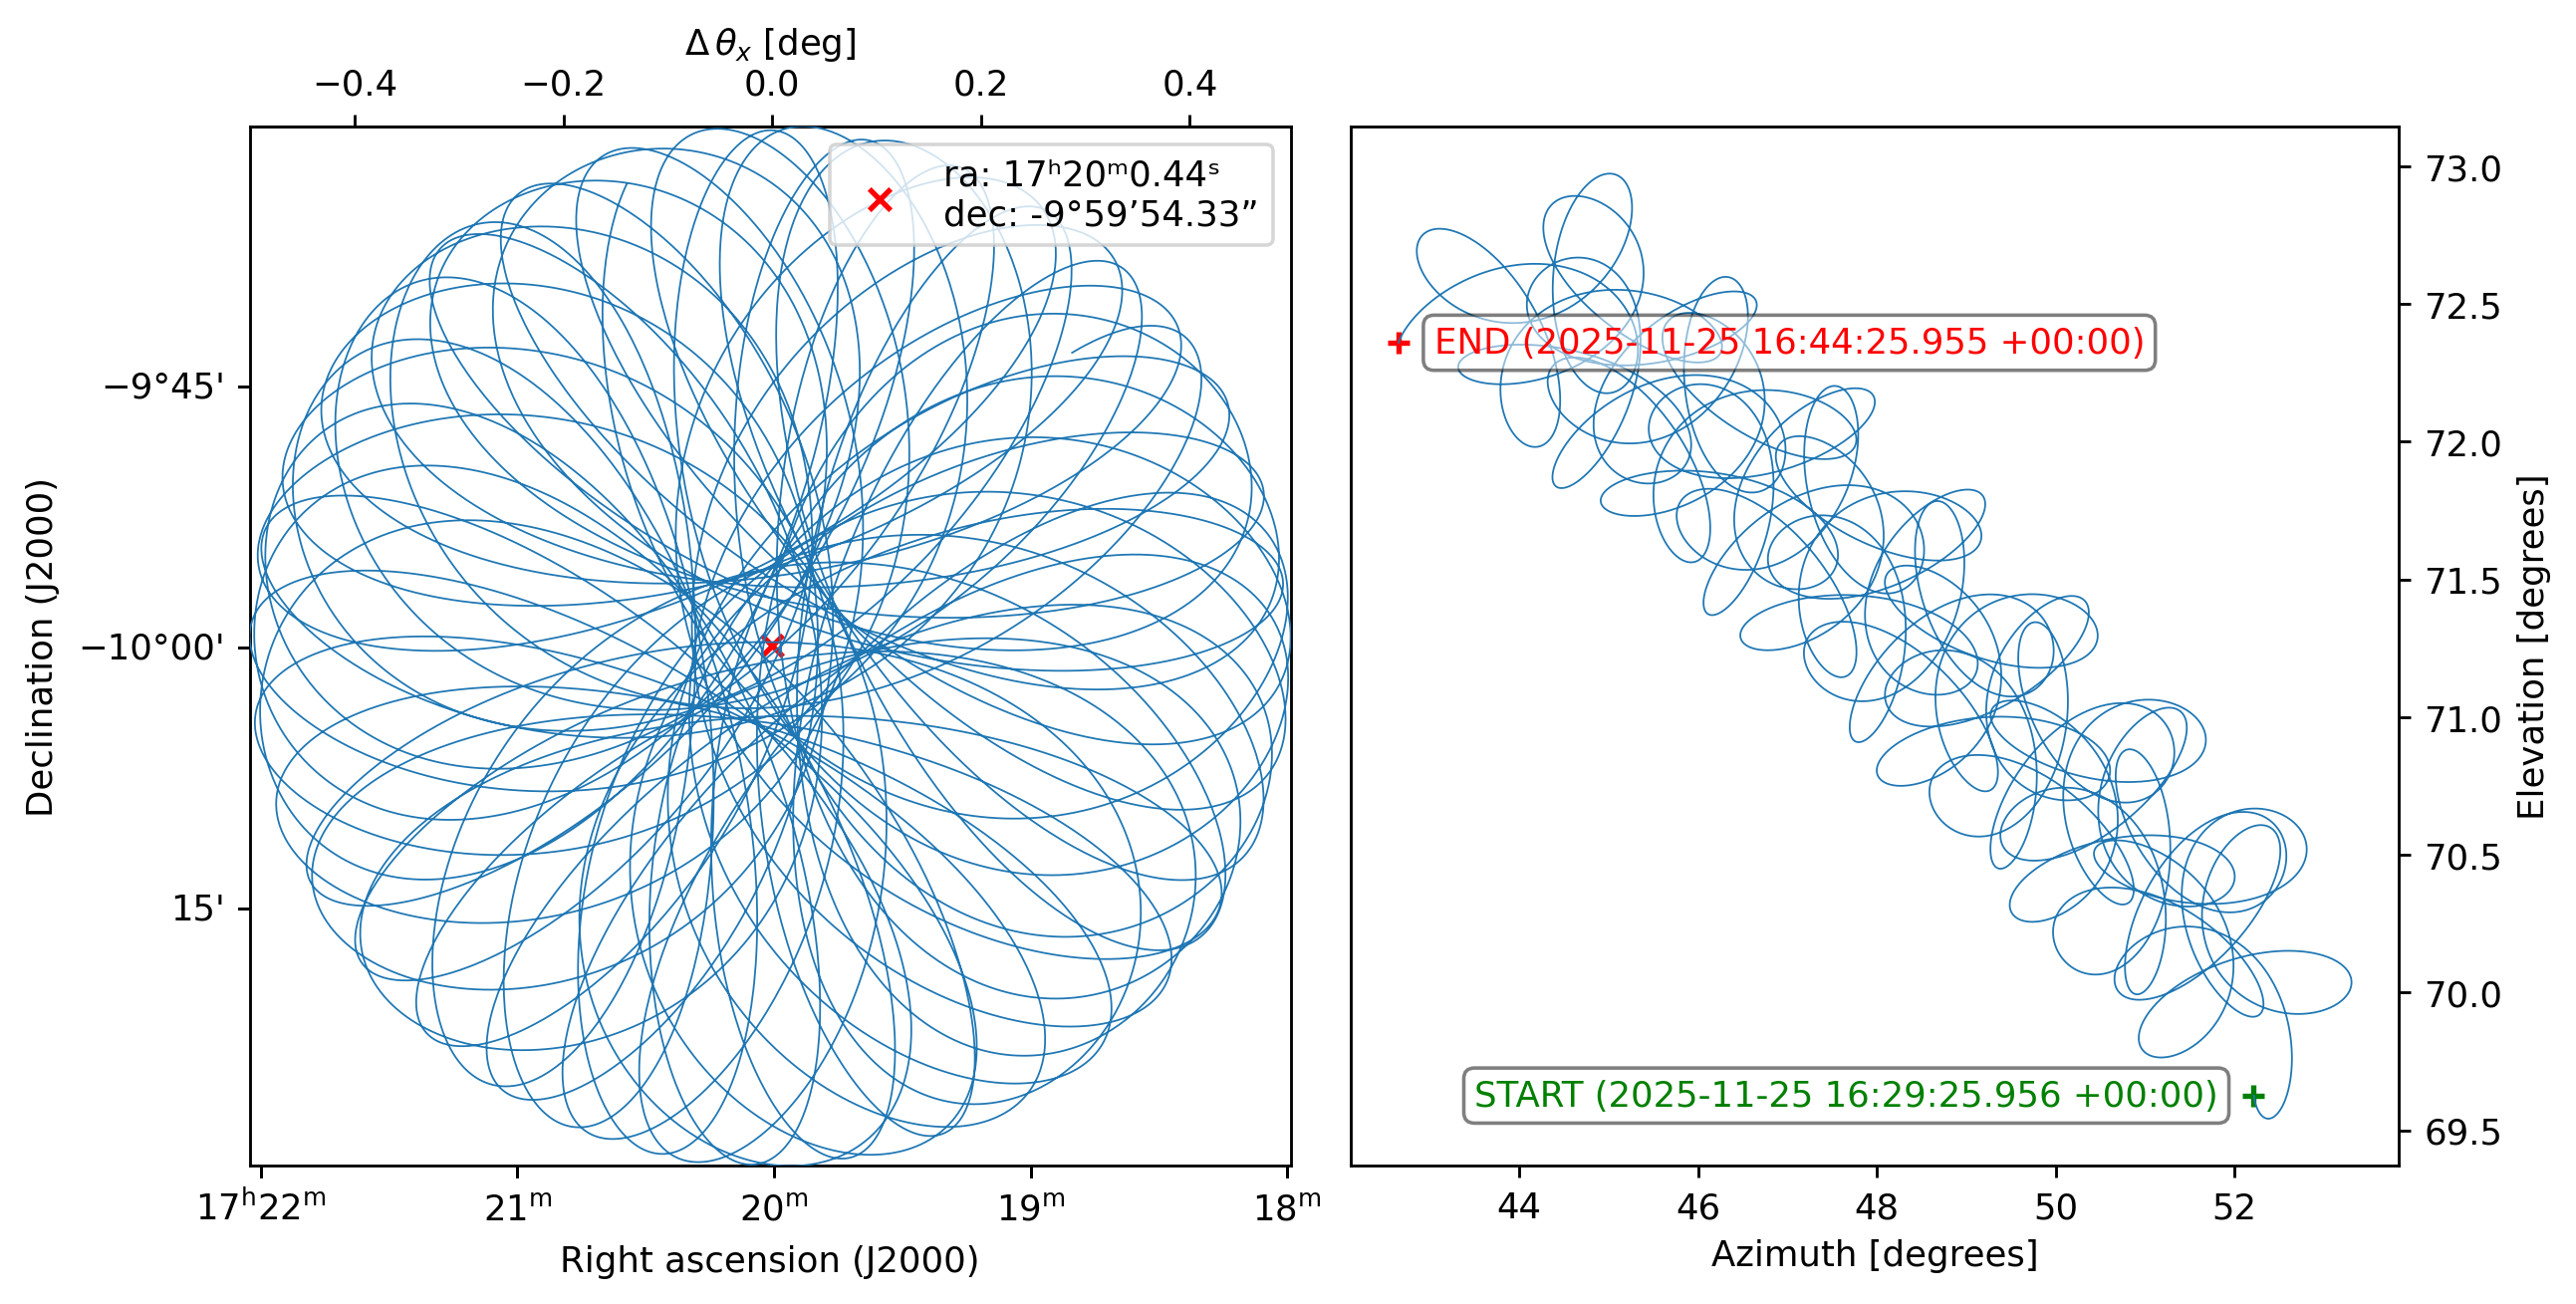

In [2]:
from maria import Planner

planner = Planner(target=input_map, site="cerro_toco", constraints={"el": (70, 90)})
plans = planner.generate_plans(total_duration=900, 
                               max_chunk_duration=900, 
                               sample_rate=50,
                               scan_options={"radius": input_map.width.deg / 2})

plans[0].plot()
print(plans)

Instrument(1 array)
├ arrays:
│            n     FOV baseline   bands polarized
│  array1  756  6.056’      0 m  [f150]     False
│ 
└ bands:
      name   center   width    η         NEP      NET_RJ         NET_CMB   FWHM
   0  f150  150 GHz  30 GHz  0.5  6.125 aW√s  30 uK_RJ√s  52.02 uK_CMB√s  10.5”


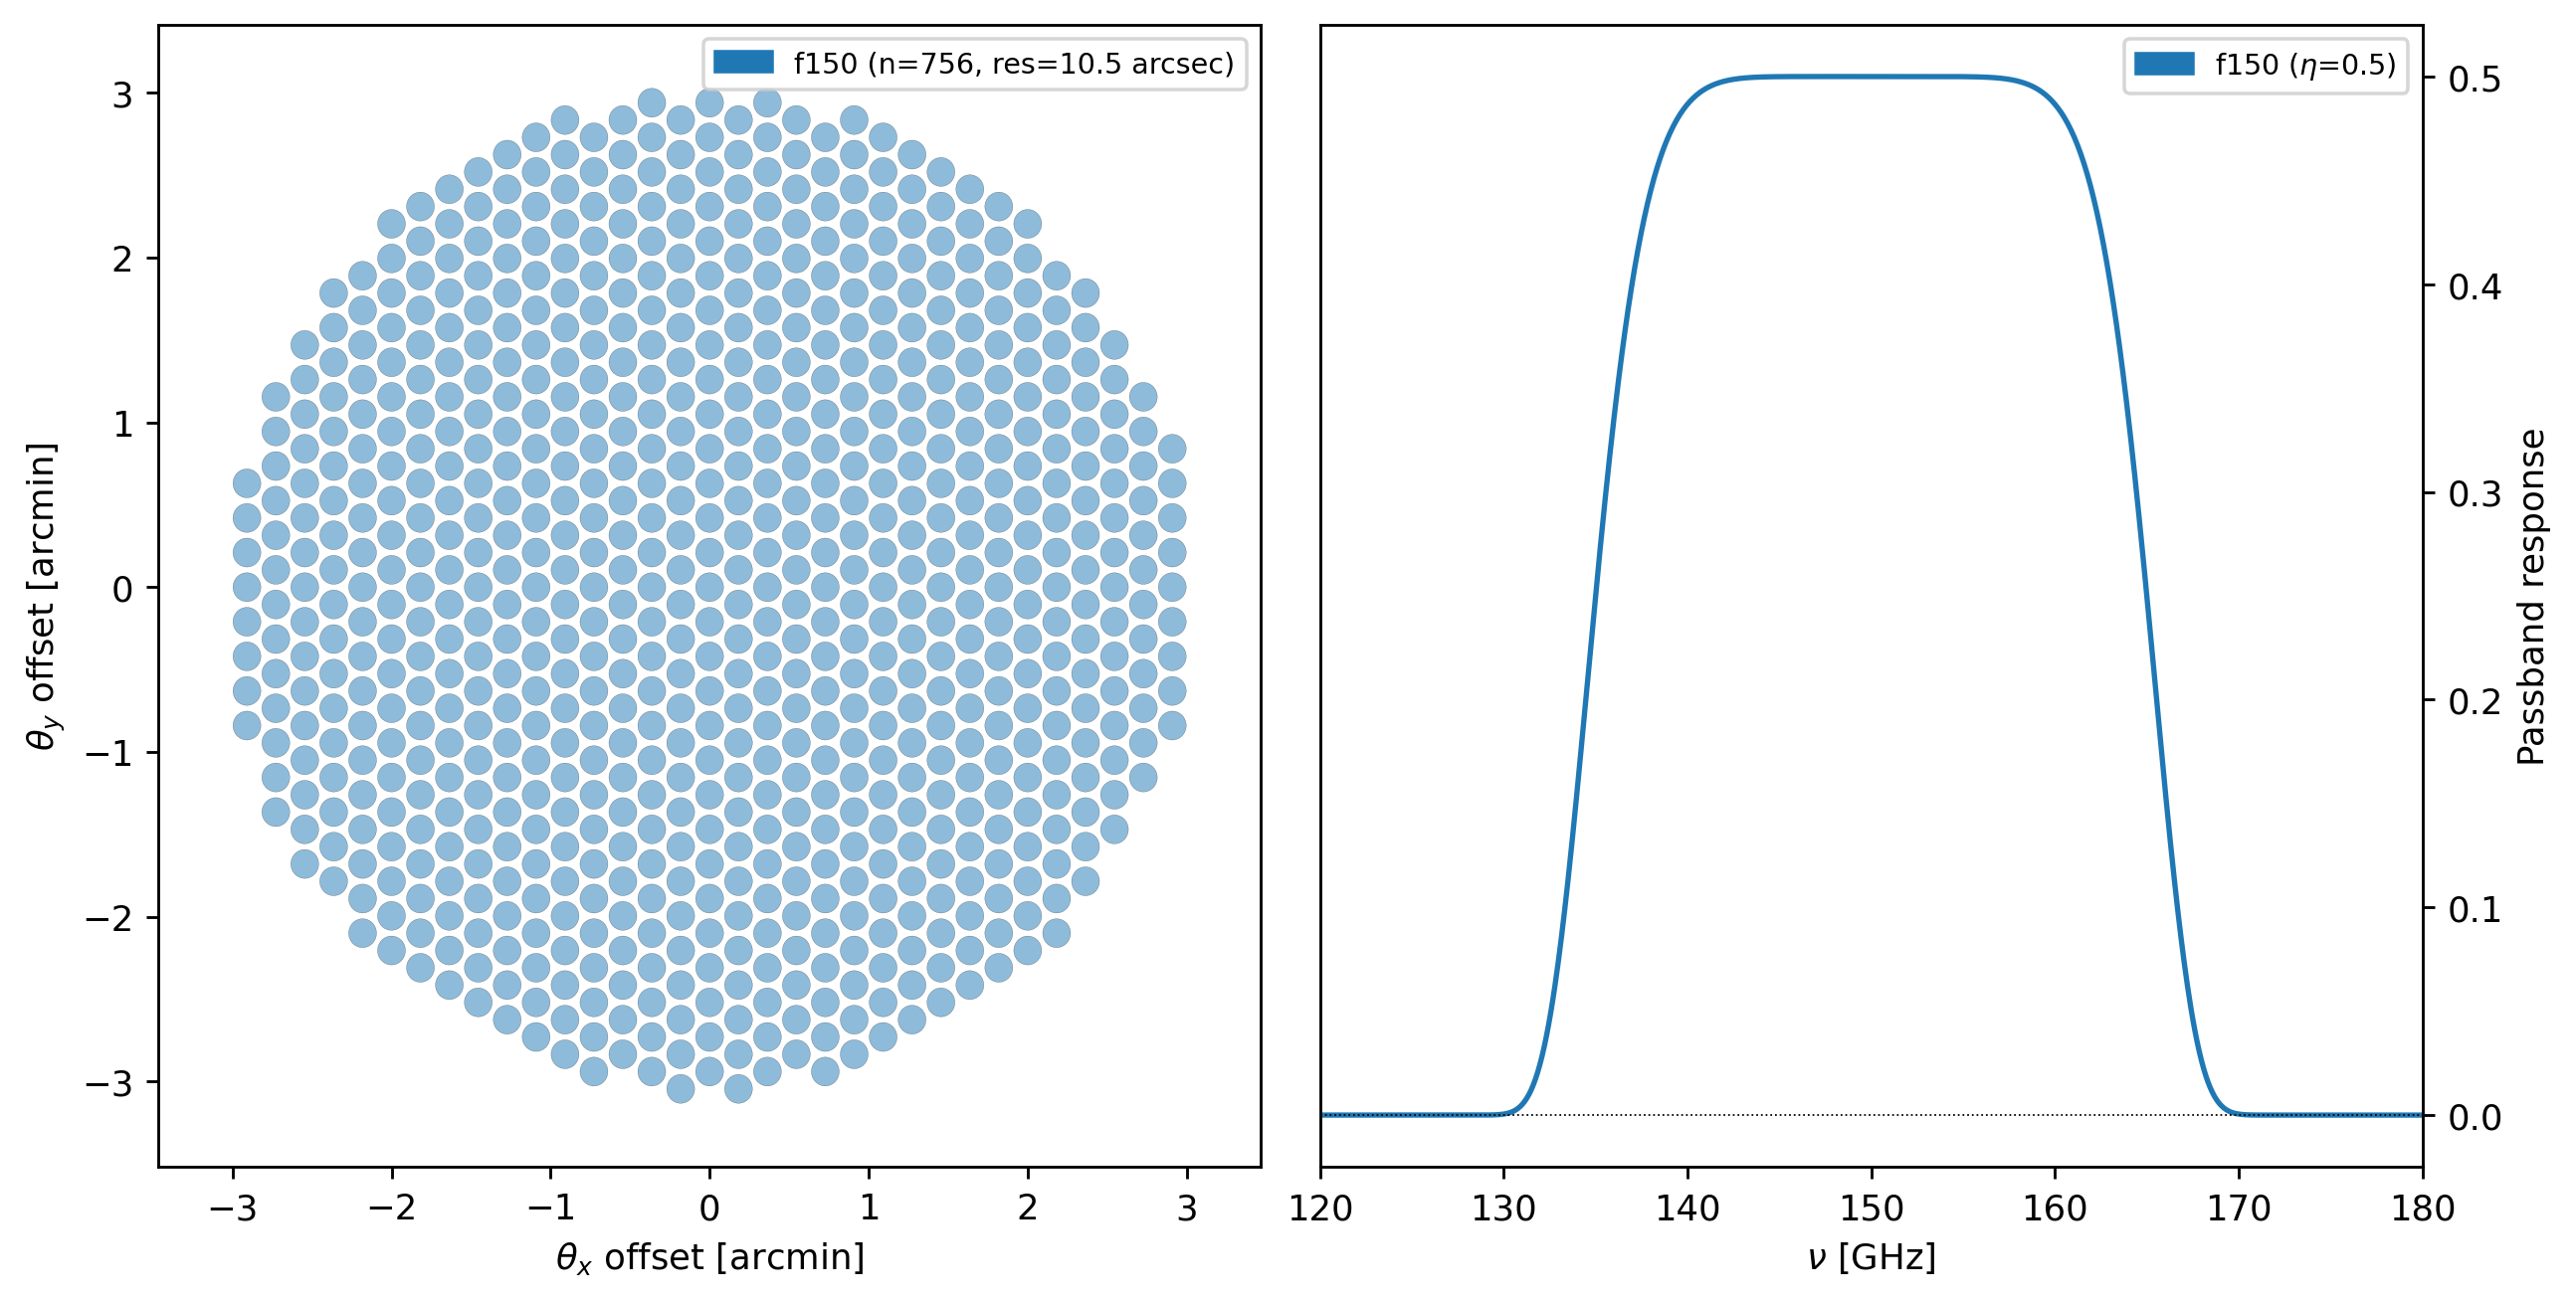

In [3]:
# import maria
from maria.instrument import Band

f150 = Band(
    center=150e9, 
    width=30e9, 
    NET_RJ=30e-6, 
    knee=1e1, 
    gain_error=2e-2)

array = {"field_of_view": 0.1, 
         "beam_spacing": 1.2,
         "primary_size": 50, 
         "shape": "circle",
         "bands": [f150]}

instrument = maria.get_instrument(array=array)

print(instrument)
instrument.plot()

In [4]:
sim = maria.Simulation(
    instrument,
    plans=plans,
    site="cerro_toco",
    map=input_map,
    atmosphere="2d",
    atmosphere_kwargs={"weather": {"pwv": 1.0}},
)

print(sim)

Simulation
├ Instrument(1 array)
│ ├ arrays:
│ │            n     FOV baseline   bands polarized
│ │  array1  756  6.056’      0 m  [f150]     False
│ │ 
│ └ bands:
│       name   center   width    η         NEP      NET_RJ         NET_CMB   FWHM
│    0  f150  150 GHz  30 GHz  0.5  6.125 aW√s  30 uK_RJ√s  52.02 uK_CMB√s  10.5”
├ Site:
│   region: chajnantor
│   timezone: America/Santiago
│   location:
│     longitude: 67°47’16.08” W
│     latitude:  22°57’30.96” S
│     altitude: 5190 m
│   seasonal: True
│   diurnal: True
├ PlanList(1 plans, 900 s):
│                            start_time duration   target(ra,dec)     center(az,el)
│ chunk                                                                            
│ 0      2025-11-25 16:29:25.956 +00:00    900 s  (260°, -9.998°)  (48.37°, 71.36°)
├ '2d'
└ ProjectionMap:
    shape(stokes, nu, t, y, x): (1, 1, 1, 1024, 1024)
    stokes: I
    nu: [150.] GHz
    t: [1.76401802e+09]
    z: naive
    quantity: spectral_flux_density_per_pix

2025-11-24 21:00:30.554 INFO: Simulating observation 1 of 1


Constructing atmosphere:   0%|                | 0/8 [00:00<?, ?it/s]

Constructing atmosphere:  12%|██              | 1/8 [00:00<00:06,  1.12it/s]

Constructing atmosphere:  25%|████            | 2/8 [00:01<00:05,  1.08it/s]

Constructing atmosphere:  38%|██████          | 3/8 [00:02<00:04,  1.02it/s]

Constructing atmosphere:  50%|████████        | 4/8 [00:04<00:04,  1.11s/it]

Constructing atmosphere:  62%|██████████      | 5/8 [00:05<00:03,  1.06s/it]

Constructing atmosphere:  75%|████████████    | 6/8 [00:06<00:02,  1.00s/it]

Constructing atmosphere:  88%|██████████████  | 7/8 [00:07<00:01,  1.06s/it]

Constructing atmosphere: 100%|████████████████| 8/8 [00:08<00:00,  1.01it/s]

Constructing atmosphere: 100%|████████████████| 8/8 [00:08<00:00,  1.01s/it]

Generating turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Generating turbulence:  50%|████████        | 4/8 [00:00<00:00, 29.72it/s]

Generating turbulence:  88%|██████████████  | 7/8 [00:00<00:00, 17.18it/s]

Generating turbulence: 100%|████████████████| 8/8 [00:00<00:00, 16.91it/s]

Sampling turbulence:   0%|                | 0/8 [00:00<?, ?it/s]

Sampling turbulence:  12%|██              | 1/8 [00:01<00:08,  1.27s/it]

Sampling turbulence:  25%|████            | 2/8 [00:01<00:04,  1.22it/s]

Sampling turbulence:  38%|██████          | 3/8 [00:02<00:03,  1.49it/s]

Sampling turbulence:  50%|████████        | 4/8 [00:02<00:02,  1.63it/s]

Sampling turbulence:  62%|██████████      | 5/8 [00:03<00:01,  1.73it/s]

Sampling turbulence:  75%|████████████    | 6/8 [00:03<00:01,  1.80it/s]

Sampling turbulence:  88%|██████████████  | 7/8 [00:04<00:00,  1.85it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:04<00:00,  1.89it/s]

Sampling turbulence: 100%|████████████████| 8/8 [00:04<00:00,  1.65it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s]

Computing atmospheric emission:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.05it/s, band=f150]

Computing atmospheric emission: 100%|████████████████| 1/1 [00:00<00:00,  1.05it/s, band=f150]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=, channel=, stokes=]

Sampling map:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]               

Sampling map: 100%|████████████████| 1/1 [00:16<00:00, 16.07s/it, band=f150]

Sampling map: 100%|████████████████| 1/1 [00:16<00:00, 16.08s/it, band=f150]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s]

Generating noise:   0%|                | 0/1 [00:00<?, ?it/s, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:01<00:00,  1.30s/it, band=f150]

Generating noise: 100%|████████████████| 1/1 [00:01<00:00,  1.31s/it, band=f150]

2025-11-24 21:01:22.871 INFO: Simulated observation 1 of 1 in 52.31 s


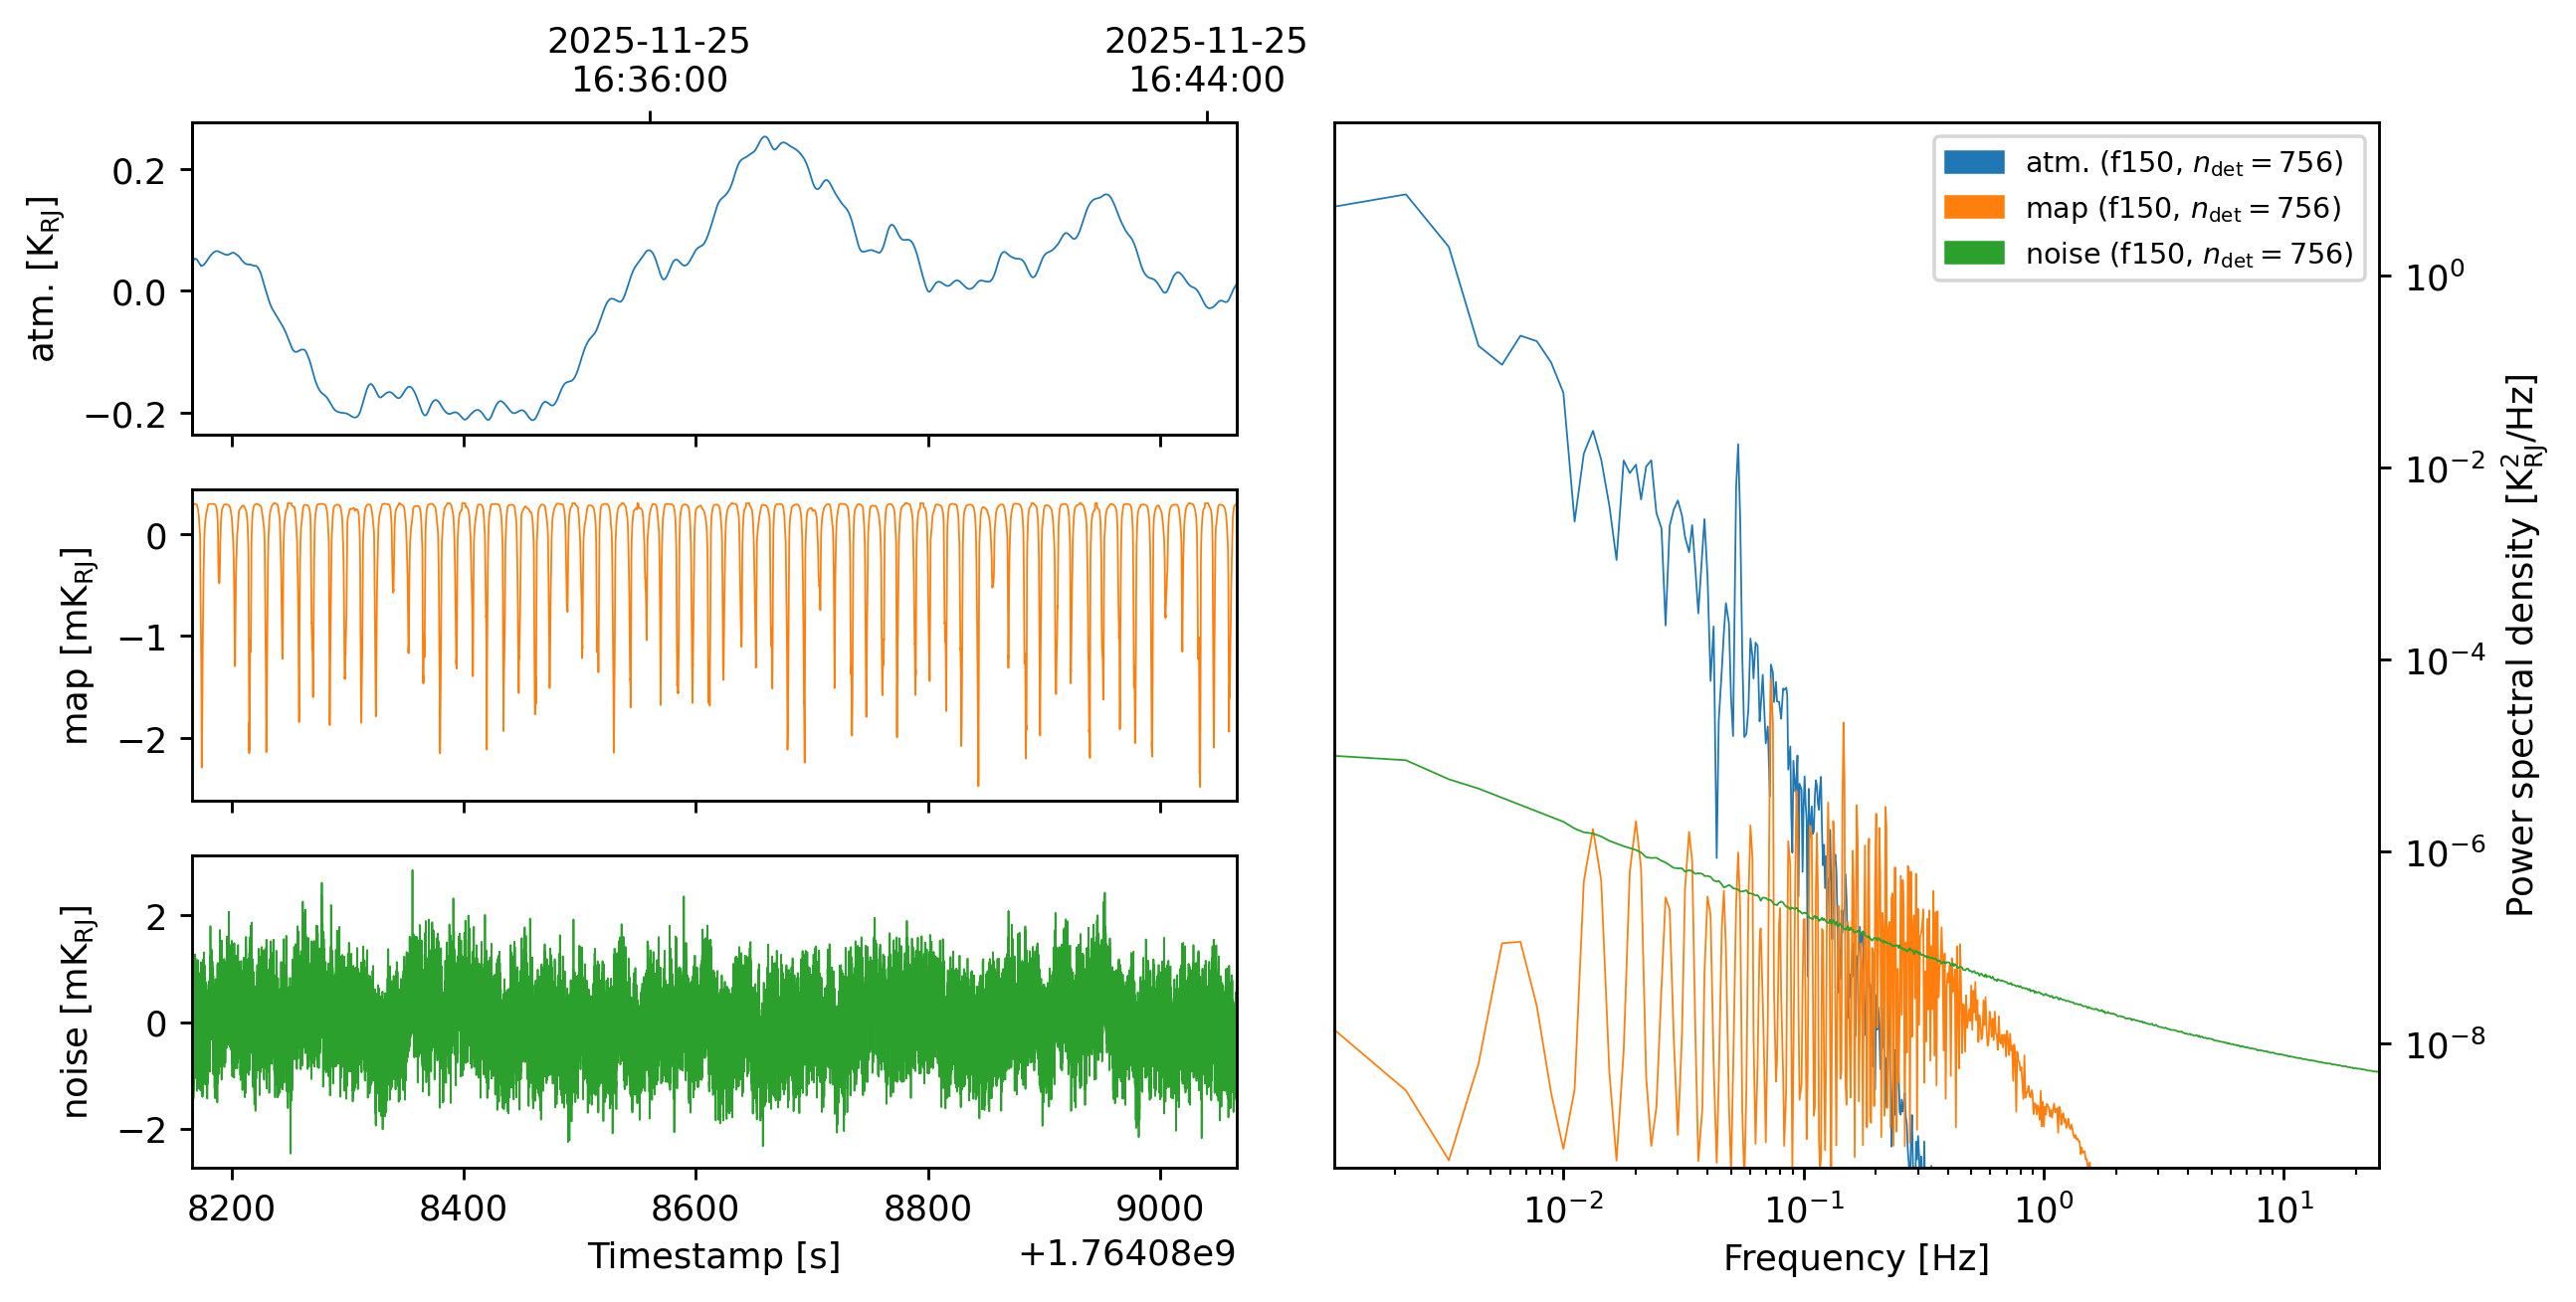

In [5]:
tods = sim.run()
tods[0].plot()

In [6]:
from maria.mappers import MaximumLikelihoodMapper

ml_mapper = MaximumLikelihoodMapper(tods=tods, 
                                    width=0.8*input_map.width.deg,
                                    height=0.8*input_map.height.deg,
                                    units="Jy/pixel")
print(f"{ml_mapper.loss() = }")

2025-11-24 21:01:32.995 INFO: Inferring center {'ra': '17ʰ20ᵐ0.51ˢ', 'dec': '-9°59’53.06”'} for mapper.


2025-11-24 21:01:33.008 INFO: Inferring mapper resolution 0.375’ for mapper from observation patch.


2025-11-24 21:01:33.010 INFO: Inferring mapper stokes parameters 'I' for mapper.


Preprocessing TODs:   0%|                | 0/1 [00:00<?, ?it/s]

Preprocessing TODs: 100%|████████████████| 1/1 [00:01<00:00,  1.41s/it]

Preprocessing TODs: 100%|████████████████| 1/1 [00:01<00:00,  1.41s/it]

Mapping:   0%|          | 0/1 [00:00<?, ?it/s, tod=1/1]

Mapping: 100%|██████████| 1/1 [00:03<00:00,  3.32s/it, tod=1/1]

Mapping: 100%|██████████| 1/1 [00:03<00:00,  3.32s/it, tod=1/1]

Computing noise model:   0%|          | 0/1 [00:00<?, ?it/s]

Computing noise model:   0%|          | 0/1 [00:00<?, ?it/s, tod=1/1]

Computing noise model: 100%|██████████| 1/1 [00:06<00:00,  6.09s/it, tod=1/1]

Computing noise model: 100%|██████████| 1/1 [00:06<00:00,  6.09s/it, tod=1/1]

ml_mapper.loss() = tensor(2564628.2500, grad_fn=<AddBackward0>)


The initial map is a "guess" constructing by heavily filtering the input TODs:

ProjectionMap:
  shape(stokes, nu, t, y, x): (1, 1, 1, 128, 128)
  stokes: I
  nu: [150.] GHz
  t: [1.76408862e+09]
  z: naive
  quantity: spectral_flux_density_per_pixel
  units: Jy/pixel
    min: -4.125e-02
    max: 1.966e-02
    rms: 4.380e-03
  center:
    ra: 17ʰ20ᵐ0.51ˢ
    dec: -9°59’53.06”
  size(y, x): (0.8°, 0.8°)
  resolution(y, x): (0.375’, 0.375’)
  beam(maj, min, rot): [[[10.4977129 10.4977129  0.       ]]]”
  memory: 0.2621 MB


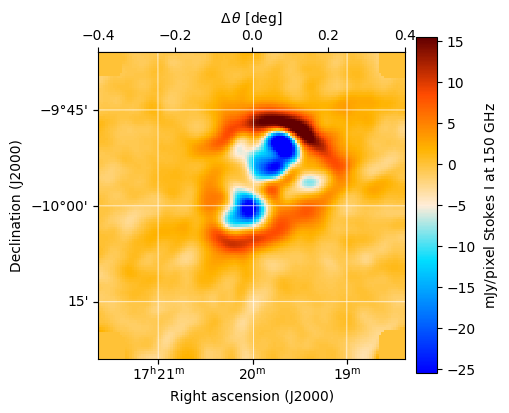

In [7]:
print(ml_mapper.map)
ml_mapper.map.plot(cmap="cmb")


To fit the map we run

In [8]:
ml_mapper.fit(epochs=4, steps_per_epoch=32, lr=1e-1)

epoch 1/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 1/4:   0%|                | 0/32 [00:04<?, ?it/s, loss=2.565e+06]

epoch 1/4:   3%|▌               | 1/32 [00:04<02:29,  4.83s/it, loss=2.565e+06]

epoch 1/4:   3%|▌               | 1/32 [00:09<02:29,  4.83s/it, loss=2.091e+06]

epoch 1/4:   6%|█               | 2/32 [00:09<02:24,  4.83s/it, loss=2.091e+06]

epoch 1/4:   6%|█               | 2/32 [00:14<02:24,  4.83s/it, loss=1.257e+06]

epoch 1/4:   9%|█▌              | 3/32 [00:14<02:20,  4.83s/it, loss=1.257e+06]

epoch 1/4:   9%|█▌              | 3/32 [00:19<02:20,  4.83s/it, loss=8.754e+05]

epoch 1/4:  12%|██              | 4/32 [00:19<02:15,  4.83s/it, loss=8.754e+05]

epoch 1/4:  12%|██              | 4/32 [00:24<02:15,  4.83s/it, loss=6.802e+05]

epoch 1/4:  16%|██▌             | 5/32 [00:24<02:10,  4.83s/it, loss=6.802e+05]

epoch 1/4:  16%|██▌             | 5/32 [00:28<02:10,  4.83s/it, loss=5.123e+05]

epoch 1/4:  19%|███             | 6/32 [00:28<02:05,  4.83s/it, loss=5.123e+05]

epoch 1/4:  19%|███             | 6/32 [00:33<02:05,  4.83s/it, loss=3.632e+05]

epoch 1/4:  22%|███▌            | 7/32 [00:33<02:00,  4.83s/it, loss=3.632e+05]

epoch 1/4:  22%|███▌            | 7/32 [00:38<02:00,  4.83s/it, loss=2.492e+05]

epoch 1/4:  25%|████            | 8/32 [00:38<01:55,  4.83s/it, loss=2.492e+05]

epoch 1/4:  25%|████            | 8/32 [00:43<01:55,  4.83s/it, loss=1.738e+05]

epoch 1/4:  28%|████▌           | 9/32 [00:43<01:50,  4.83s/it, loss=1.738e+05]

epoch 1/4:  28%|████▌           | 9/32 [00:48<01:50,  4.83s/it, loss=1.293e+05]

epoch 1/4:  31%|█████           | 10/32 [00:48<01:46,  4.83s/it, loss=1.293e+05]

epoch 1/4:  31%|█████           | 10/32 [00:53<01:46,  4.83s/it, loss=1.047e+05]

epoch 1/4:  34%|█████▌          | 11/32 [00:53<01:41,  4.83s/it, loss=1.047e+05]

epoch 1/4:  34%|█████▌          | 11/32 [00:57<01:41,  4.83s/it, loss=9.052e+04]

epoch 1/4:  38%|██████          | 12/32 [00:57<01:36,  4.83s/it, loss=9.052e+04]

epoch 1/4:  38%|██████          | 12/32 [01:02<01:36,  4.83s/it, loss=8.089e+04]

epoch 1/4:  41%|██████▌         | 13/32 [01:02<01:31,  4.83s/it, loss=8.089e+04]

epoch 1/4:  41%|██████▌         | 13/32 [01:07<01:31,  4.83s/it, loss=7.275e+04]

epoch 1/4:  44%|███████         | 14/32 [01:07<01:26,  4.83s/it, loss=7.275e+04]

epoch 1/4:  44%|███████         | 14/32 [01:12<01:26,  4.83s/it, loss=6.511e+04]

epoch 1/4:  47%|███████▌        | 15/32 [01:12<01:22,  4.83s/it, loss=6.511e+04]

epoch 1/4:  47%|███████▌        | 15/32 [01:17<01:22,  4.83s/it, loss=5.797e+04]

epoch 1/4:  50%|████████        | 16/32 [01:17<01:17,  4.83s/it, loss=5.797e+04]

epoch 1/4:  50%|████████        | 16/32 [01:22<01:17,  4.83s/it, loss=5.166e+04]

epoch 1/4:  53%|████████▌       | 17/32 [01:22<01:12,  4.83s/it, loss=5.166e+04]

epoch 1/4:  53%|████████▌       | 17/32 [01:26<01:12,  4.83s/it, loss=4.647e+04]

epoch 1/4:  56%|█████████       | 18/32 [01:26<01:07,  4.82s/it, loss=4.647e+04]

epoch 1/4:  56%|█████████       | 18/32 [01:31<01:07,  4.82s/it, loss=4.254e+04]

epoch 1/4:  59%|█████████▌      | 19/32 [01:31<01:02,  4.82s/it, loss=4.254e+04]

epoch 1/4:  59%|█████████▌      | 19/32 [01:36<01:02,  4.82s/it, loss=3.982e+04]

epoch 1/4:  62%|██████████      | 20/32 [01:36<00:57,  4.83s/it, loss=3.982e+04]

epoch 1/4:  62%|██████████      | 20/32 [01:41<00:57,  4.83s/it, loss=3.812e+04]

epoch 1/4:  66%|██████████▌     | 21/32 [01:41<00:53,  4.83s/it, loss=3.812e+04]

epoch 1/4:  66%|██████████▌     | 21/32 [01:46<00:53,  4.83s/it, loss=3.720e+04]

epoch 1/4:  69%|███████████     | 22/32 [01:46<00:48,  4.83s/it, loss=3.720e+04]

epoch 1/4:  69%|███████████     | 22/32 [01:51<00:48,  4.83s/it, loss=3.678e+04]

epoch 1/4:  72%|███████████▌    | 23/32 [01:51<00:43,  4.83s/it, loss=3.678e+04]

epoch 1/4:  72%|███████████▌    | 23/32 [01:55<00:43,  4.83s/it, loss=3.663e+04]

epoch 1/4:  75%|████████████    | 24/32 [01:55<00:38,  4.83s/it, loss=3.663e+04]

epoch 1/4:  75%|████████████    | 24/32 [02:00<00:38,  4.83s/it, loss=3.654e+04]

epoch 1/4:  78%|████████████▌   | 25/32 [02:00<00:33,  4.83s/it, loss=3.654e+04]

epoch 1/4:  78%|████████████▌   | 25/32 [02:05<00:33,  4.83s/it, loss=3.637e+04]

epoch 1/4:  81%|█████████████   | 26/32 [02:05<00:28,  4.83s/it, loss=3.637e+04]

epoch 1/4:  81%|█████████████   | 26/32 [02:10<00:28,  4.83s/it, loss=3.606e+04]

epoch 1/4:  84%|█████████████▌  | 27/32 [02:10<00:24,  4.83s/it, loss=3.606e+04]

epoch 1/4:  84%|█████████████▌  | 27/32 [02:15<00:24,  4.83s/it, loss=3.557e+04]

epoch 1/4:  88%|██████████████  | 28/32 [02:15<00:19,  4.83s/it, loss=3.557e+04]

epoch 1/4:  88%|██████████████  | 28/32 [02:20<00:19,  4.83s/it, loss=3.491e+04]

epoch 1/4:  91%|██████████████▌ | 29/32 [02:20<00:14,  4.83s/it, loss=3.491e+04]

epoch 1/4:  91%|██████████████▌ | 29/32 [02:24<00:14,  4.83s/it, loss=3.411e+04]

epoch 1/4:  94%|███████████████ | 30/32 [02:24<00:09,  4.83s/it, loss=3.411e+04]

epoch 1/4:  94%|███████████████ | 30/32 [02:29<00:09,  4.83s/it, loss=3.322e+04]

epoch 1/4:  97%|███████████████▌| 31/32 [02:29<00:04,  4.83s/it, loss=3.322e+04]

epoch 1/4:  97%|███████████████▌| 31/32 [02:34<00:04,  4.83s/it, loss=3.229e+04]

epoch 1/4: 100%|████████████████| 32/32 [02:34<00:00,  4.82s/it, loss=3.229e+04]

epoch 1/4: 100%|████████████████| 32/32 [02:34<00:00,  4.83s/it, loss=3.229e+04]

epoch 2/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 2/4:   0%|                | 0/32 [00:04<?, ?it/s, loss=3.136e+04]

epoch 2/4:   3%|▌               | 1/32 [00:04<02:29,  4.83s/it, loss=3.136e+04]

epoch 2/4:   3%|▌               | 1/32 [00:09<02:29,  4.83s/it, loss=3.046e+04]

epoch 2/4:   6%|█               | 2/32 [00:09<02:24,  4.82s/it, loss=3.046e+04]

epoch 2/4:   6%|█               | 2/32 [00:14<02:24,  4.82s/it, loss=2.961e+04]

epoch 2/4:   9%|█▌              | 3/32 [00:14<02:19,  4.82s/it, loss=2.961e+04]

epoch 2/4:   9%|█▌              | 3/32 [00:19<02:19,  4.82s/it, loss=2.883e+04]

epoch 2/4:  12%|██              | 4/32 [00:19<02:15,  4.82s/it, loss=2.883e+04]

epoch 2/4:  12%|██              | 4/32 [00:24<02:15,  4.82s/it, loss=2.810e+04]

epoch 2/4:  16%|██▌             | 5/32 [00:24<02:10,  4.82s/it, loss=2.810e+04]

epoch 2/4:  16%|██▌             | 5/32 [00:28<02:10,  4.82s/it, loss=2.741e+04]

epoch 2/4:  19%|███             | 6/32 [00:28<02:05,  4.82s/it, loss=2.741e+04]

epoch 2/4:  19%|███             | 6/32 [00:33<02:05,  4.82s/it, loss=2.675e+04]

epoch 2/4:  22%|███▌            | 7/32 [00:33<02:00,  4.83s/it, loss=2.675e+04]

epoch 2/4:  22%|███▌            | 7/32 [00:38<02:00,  4.83s/it, loss=2.611e+04]

epoch 2/4:  25%|████            | 8/32 [00:38<01:55,  4.83s/it, loss=2.611e+04]

epoch 2/4:  25%|████            | 8/32 [00:43<01:55,  4.83s/it, loss=2.546e+04]

epoch 2/4:  28%|████▌           | 9/32 [00:43<01:51,  4.83s/it, loss=2.546e+04]

epoch 2/4:  28%|████▌           | 9/32 [00:48<01:51,  4.83s/it, loss=2.479e+04]

epoch 2/4:  31%|█████           | 10/32 [00:48<01:46,  4.82s/it, loss=2.479e+04]

epoch 2/4:  31%|█████           | 10/32 [00:53<01:46,  4.82s/it, loss=2.411e+04]

epoch 2/4:  34%|█████▌          | 11/32 [00:53<01:41,  4.82s/it, loss=2.411e+04]

epoch 2/4:  34%|█████▌          | 11/32 [00:57<01:41,  4.82s/it, loss=2.340e+04]

epoch 2/4:  38%|██████          | 12/32 [00:57<01:36,  4.82s/it, loss=2.340e+04]

epoch 2/4:  38%|██████          | 12/32 [01:02<01:36,  4.82s/it, loss=2.268e+04]

epoch 2/4:  41%|██████▌         | 13/32 [01:02<01:31,  4.83s/it, loss=2.268e+04]

epoch 2/4:  41%|██████▌         | 13/32 [01:07<01:31,  4.83s/it, loss=2.195e+04]

epoch 2/4:  44%|███████         | 14/32 [01:07<01:26,  4.83s/it, loss=2.195e+04]

epoch 2/4:  44%|███████         | 14/32 [01:12<01:26,  4.83s/it, loss=2.122e+04]

epoch 2/4:  47%|███████▌        | 15/32 [01:12<01:22,  4.83s/it, loss=2.122e+04]

epoch 2/4:  47%|███████▌        | 15/32 [01:17<01:22,  4.83s/it, loss=2.049e+04]

epoch 2/4:  50%|████████        | 16/32 [01:17<01:17,  4.83s/it, loss=2.049e+04]

epoch 2/4:  50%|████████        | 16/32 [01:22<01:17,  4.83s/it, loss=1.978e+04]

epoch 2/4:  53%|████████▌       | 17/32 [01:22<01:12,  4.83s/it, loss=1.978e+04]

epoch 2/4:  53%|████████▌       | 17/32 [01:26<01:12,  4.83s/it, loss=1.909e+04]

epoch 2/4:  56%|█████████       | 18/32 [01:26<01:07,  4.83s/it, loss=1.909e+04]

epoch 2/4:  56%|█████████       | 18/32 [01:31<01:07,  4.83s/it, loss=1.843e+04]

epoch 2/4:  59%|█████████▌      | 19/32 [01:31<01:02,  4.83s/it, loss=1.843e+04]

epoch 2/4:  59%|█████████▌      | 19/32 [01:36<01:02,  4.83s/it, loss=1.779e+04]

epoch 2/4:  62%|██████████      | 20/32 [01:36<00:57,  4.82s/it, loss=1.779e+04]

epoch 2/4:  62%|██████████      | 20/32 [01:41<00:57,  4.82s/it, loss=1.718e+04]

epoch 2/4:  66%|██████████▌     | 21/32 [01:41<00:53,  4.82s/it, loss=1.718e+04]

epoch 2/4:  66%|██████████▌     | 21/32 [01:46<00:53,  4.82s/it, loss=1.659e+04]

epoch 2/4:  69%|███████████     | 22/32 [01:46<00:48,  4.82s/it, loss=1.659e+04]

epoch 2/4:  69%|███████████     | 22/32 [01:50<00:48,  4.82s/it, loss=1.602e+04]

epoch 2/4:  72%|███████████▌    | 23/32 [01:50<00:43,  4.82s/it, loss=1.602e+04]

epoch 2/4:  72%|███████████▌    | 23/32 [01:55<00:43,  4.82s/it, loss=1.546e+04]

epoch 2/4:  75%|████████████    | 24/32 [01:55<00:38,  4.82s/it, loss=1.546e+04]

epoch 2/4:  75%|████████████    | 24/32 [02:00<00:38,  4.82s/it, loss=1.493e+04]

epoch 2/4:  78%|████████████▌   | 25/32 [02:00<00:33,  4.82s/it, loss=1.493e+04]

epoch 2/4:  78%|████████████▌   | 25/32 [02:05<00:33,  4.82s/it, loss=1.440e+04]

epoch 2/4:  81%|█████████████   | 26/32 [02:05<00:28,  4.82s/it, loss=1.440e+04]

epoch 2/4:  81%|█████████████   | 26/32 [02:10<00:28,  4.82s/it, loss=1.389e+04]

epoch 2/4:  84%|█████████████▌  | 27/32 [02:10<00:24,  4.82s/it, loss=1.389e+04]

epoch 2/4:  84%|█████████████▌  | 27/32 [02:15<00:24,  4.82s/it, loss=1.339e+04]

epoch 2/4:  88%|██████████████  | 28/32 [02:15<00:19,  4.82s/it, loss=1.339e+04]

epoch 2/4:  88%|██████████████  | 28/32 [02:19<00:19,  4.82s/it, loss=1.291e+04]

epoch 2/4:  91%|██████████████▌ | 29/32 [02:19<00:14,  4.83s/it, loss=1.291e+04]

epoch 2/4:  91%|██████████████▌ | 29/32 [02:24<00:14,  4.83s/it, loss=1.245e+04]

epoch 2/4:  94%|███████████████ | 30/32 [02:24<00:09,  4.83s/it, loss=1.245e+04]

epoch 2/4:  94%|███████████████ | 30/32 [02:29<00:09,  4.83s/it, loss=1.200e+04]

epoch 2/4:  97%|███████████████▌| 31/32 [02:29<00:04,  4.83s/it, loss=1.200e+04]

epoch 2/4:  97%|███████████████▌| 31/32 [02:34<00:04,  4.83s/it, loss=1.158e+04]

epoch 2/4: 100%|████████████████| 32/32 [02:34<00:00,  4.83s/it, loss=1.158e+04]

epoch 2/4: 100%|████████████████| 32/32 [02:34<00:00,  4.83s/it, loss=1.158e+04]

epoch 3/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 3/4:   0%|                | 0/32 [00:04<?, ?it/s, loss=1.117e+04]

epoch 3/4:   3%|▌               | 1/32 [00:04<02:29,  4.83s/it, loss=1.117e+04]

epoch 3/4:   3%|▌               | 1/32 [00:09<02:29,  4.83s/it, loss=1.079e+04]

epoch 3/4:   6%|█               | 2/32 [00:09<02:25,  4.84s/it, loss=1.079e+04]

epoch 3/4:   6%|█               | 2/32 [00:14<02:25,  4.84s/it, loss=1.042e+04]

epoch 3/4:   9%|█▌              | 3/32 [00:14<02:20,  4.84s/it, loss=1.042e+04]

epoch 3/4:   9%|█▌              | 3/32 [00:19<02:20,  4.84s/it, loss=1.007e+04]

epoch 3/4:  12%|██              | 4/32 [00:19<02:15,  4.83s/it, loss=1.007e+04]

epoch 3/4:  12%|██              | 4/32 [00:24<02:15,  4.83s/it, loss=9.739e+03]

epoch 3/4:  16%|██▌             | 5/32 [00:24<02:10,  4.83s/it, loss=9.739e+03]

epoch 3/4:  16%|██▌             | 5/32 [00:28<02:10,  4.83s/it, loss=9.423e+03]

epoch 3/4:  19%|███             | 6/32 [00:28<02:05,  4.83s/it, loss=9.423e+03]

epoch 3/4:  19%|███             | 6/32 [00:33<02:05,  4.83s/it, loss=9.123e+03]

epoch 3/4:  22%|███▌            | 7/32 [00:33<02:00,  4.83s/it, loss=9.123e+03]

epoch 3/4:  22%|███▌            | 7/32 [00:38<02:00,  4.83s/it, loss=8.838e+03]

epoch 3/4:  25%|████            | 8/32 [00:38<01:55,  4.83s/it, loss=8.838e+03]

epoch 3/4:  25%|████            | 8/32 [00:43<01:55,  4.83s/it, loss=8.566e+03]

epoch 3/4:  28%|████▌           | 9/32 [00:43<01:51,  4.83s/it, loss=8.566e+03]

epoch 3/4:  28%|████▌           | 9/32 [00:48<01:51,  4.83s/it, loss=8.309e+03]

epoch 3/4:  31%|█████           | 10/32 [00:48<01:46,  4.83s/it, loss=8.309e+03]

epoch 3/4:  31%|█████           | 10/32 [00:53<01:46,  4.83s/it, loss=8.066e+03]

epoch 3/4:  34%|█████▌          | 11/32 [00:53<01:41,  4.83s/it, loss=8.066e+03]

epoch 3/4:  34%|█████▌          | 11/32 [00:57<01:41,  4.83s/it, loss=7.837e+03]

epoch 3/4:  38%|██████          | 12/32 [00:57<01:36,  4.83s/it, loss=7.837e+03]

epoch 3/4:  38%|██████          | 12/32 [01:02<01:36,  4.83s/it, loss=7.621e+03]

epoch 3/4:  41%|██████▌         | 13/32 [01:02<01:31,  4.83s/it, loss=7.621e+03]

epoch 3/4:  41%|██████▌         | 13/32 [01:07<01:31,  4.83s/it, loss=7.417e+03]

epoch 3/4:  44%|███████         | 14/32 [01:07<01:27,  4.84s/it, loss=7.417e+03]

epoch 3/4:  44%|███████         | 14/32 [01:12<01:27,  4.84s/it, loss=7.227e+03]

epoch 3/4:  47%|███████▌        | 15/32 [01:12<01:22,  4.84s/it, loss=7.227e+03]

epoch 3/4:  47%|███████▌        | 15/32 [01:17<01:22,  4.84s/it, loss=7.048e+03]

epoch 3/4:  50%|████████        | 16/32 [01:17<01:17,  4.84s/it, loss=7.048e+03]

epoch 3/4:  50%|████████        | 16/32 [01:22<01:17,  4.84s/it, loss=6.880e+03]

epoch 3/4:  53%|████████▌       | 17/32 [01:22<01:12,  4.83s/it, loss=6.880e+03]

epoch 3/4:  53%|████████▌       | 17/32 [01:27<01:12,  4.83s/it, loss=6.723e+03]

epoch 3/4:  56%|█████████       | 18/32 [01:27<01:07,  4.84s/it, loss=6.723e+03]

epoch 3/4:  56%|█████████       | 18/32 [01:31<01:07,  4.84s/it, loss=6.576e+03]

epoch 3/4:  59%|█████████▌      | 19/32 [01:31<01:02,  4.83s/it, loss=6.576e+03]

epoch 3/4:  59%|█████████▌      | 19/32 [01:36<01:02,  4.83s/it, loss=6.438e+03]

epoch 3/4:  62%|██████████      | 20/32 [01:36<00:57,  4.83s/it, loss=6.438e+03]

epoch 3/4:  62%|██████████      | 20/32 [01:41<00:57,  4.83s/it, loss=6.309e+03]

epoch 3/4:  66%|██████████▌     | 21/32 [01:41<00:53,  4.83s/it, loss=6.309e+03]

epoch 3/4:  66%|██████████▌     | 21/32 [01:46<00:53,  4.83s/it, loss=6.189e+03]

epoch 3/4:  69%|███████████     | 22/32 [01:46<00:48,  4.83s/it, loss=6.189e+03]

epoch 3/4:  69%|███████████     | 22/32 [01:51<00:48,  4.83s/it, loss=6.076e+03]

epoch 3/4:  72%|███████████▌    | 23/32 [01:51<00:43,  4.83s/it, loss=6.076e+03]

epoch 3/4:  72%|███████████▌    | 23/32 [01:55<00:43,  4.83s/it, loss=5.971e+03]

epoch 3/4:  75%|████████████    | 24/32 [01:55<00:38,  4.83s/it, loss=5.971e+03]

epoch 3/4:  75%|████████████    | 24/32 [02:00<00:38,  4.83s/it, loss=5.873e+03]

epoch 3/4:  78%|████████████▌   | 25/32 [02:00<00:33,  4.83s/it, loss=5.873e+03]

epoch 3/4:  78%|████████████▌   | 25/32 [02:05<00:33,  4.83s/it, loss=5.782e+03]

epoch 3/4:  81%|█████████████   | 26/32 [02:05<00:28,  4.83s/it, loss=5.782e+03]

epoch 3/4:  81%|█████████████   | 26/32 [02:10<00:28,  4.83s/it, loss=5.697e+03]

epoch 3/4:  84%|█████████████▌  | 27/32 [02:10<00:24,  4.83s/it, loss=5.697e+03]

epoch 3/4:  84%|█████████████▌  | 27/32 [02:15<00:24,  4.83s/it, loss=5.619e+03]

epoch 3/4:  88%|██████████████  | 28/32 [02:15<00:19,  4.83s/it, loss=5.619e+03]

epoch 3/4:  88%|██████████████  | 28/32 [02:20<00:19,  4.83s/it, loss=5.545e+03]

epoch 3/4:  91%|██████████████▌ | 29/32 [02:20<00:14,  4.83s/it, loss=5.545e+03]

epoch 3/4:  91%|██████████████▌ | 29/32 [02:24<00:14,  4.83s/it, loss=5.477e+03]

epoch 3/4:  94%|███████████████ | 30/32 [02:24<00:09,  4.84s/it, loss=5.477e+03]

epoch 3/4:  94%|███████████████ | 30/32 [02:29<00:09,  4.84s/it, loss=5.413e+03]

epoch 3/4:  97%|███████████████▌| 31/32 [02:29<00:04,  4.84s/it, loss=5.413e+03]

epoch 3/4:  97%|███████████████▌| 31/32 [02:34<00:04,  4.84s/it, loss=5.354e+03]

epoch 3/4: 100%|████████████████| 32/32 [02:34<00:00,  4.84s/it, loss=5.354e+03]

epoch 3/4: 100%|████████████████| 32/32 [02:34<00:00,  4.83s/it, loss=5.354e+03]

epoch 4/4:   0%|                | 0/32 [00:00<?, ?it/s]

epoch 4/4:   0%|                | 0/32 [00:04<?, ?it/s, loss=5.299e+03]

epoch 4/4:   3%|▌               | 1/32 [00:04<02:30,  4.85s/it, loss=5.299e+03]

epoch 4/4:   3%|▌               | 1/32 [00:09<02:30,  4.85s/it, loss=5.247e+03]

epoch 4/4:   6%|█               | 2/32 [00:09<02:25,  4.85s/it, loss=5.247e+03]

epoch 4/4:   6%|█               | 2/32 [00:14<02:25,  4.85s/it, loss=5.199e+03]

epoch 4/4:   9%|█▌              | 3/32 [00:14<02:20,  4.84s/it, loss=5.199e+03]

epoch 4/4:   9%|█▌              | 3/32 [00:19<02:20,  4.84s/it, loss=5.154e+03]

epoch 4/4:  12%|██              | 4/32 [00:19<02:15,  4.84s/it, loss=5.154e+03]

epoch 4/4:  12%|██              | 4/32 [00:24<02:15,  4.84s/it, loss=5.112e+03]

epoch 4/4:  16%|██▌             | 5/32 [00:24<02:10,  4.84s/it, loss=5.112e+03]

epoch 4/4:  16%|██▌             | 5/32 [00:29<02:10,  4.84s/it, loss=5.072e+03]

epoch 4/4:  19%|███             | 6/32 [00:29<02:05,  4.84s/it, loss=5.072e+03]

epoch 4/4:  19%|███             | 6/32 [00:33<02:05,  4.84s/it, loss=5.035e+03]

epoch 4/4:  22%|███▌            | 7/32 [00:33<02:01,  4.84s/it, loss=5.035e+03]

epoch 4/4:  22%|███▌            | 7/32 [00:38<02:01,  4.84s/it, loss=5.000e+03]

epoch 4/4:  25%|████            | 8/32 [00:38<01:56,  4.84s/it, loss=5.000e+03]

epoch 4/4:  25%|████            | 8/32 [00:43<01:56,  4.84s/it, loss=4.967e+03]

epoch 4/4:  28%|████▌           | 9/32 [00:43<01:51,  4.84s/it, loss=4.967e+03]

epoch 4/4:  28%|████▌           | 9/32 [00:48<01:51,  4.84s/it, loss=4.936e+03]

epoch 4/4:  31%|█████           | 10/32 [00:48<01:46,  4.84s/it, loss=4.936e+03]

epoch 4/4:  31%|█████           | 10/32 [00:53<01:46,  4.84s/it, loss=4.906e+03]

epoch 4/4:  34%|█████▌          | 11/32 [00:53<01:41,  4.85s/it, loss=4.906e+03]

epoch 4/4:  34%|█████▌          | 11/32 [00:58<01:41,  4.85s/it, loss=4.878e+03]

epoch 4/4:  38%|██████          | 12/32 [00:58<01:36,  4.84s/it, loss=4.878e+03]

epoch 4/4:  38%|██████          | 12/32 [01:02<01:36,  4.84s/it, loss=4.851e+03]

epoch 4/4:  41%|██████▌         | 13/32 [01:02<01:31,  4.84s/it, loss=4.851e+03]

epoch 4/4:  41%|██████▌         | 13/32 [01:07<01:31,  4.84s/it, loss=4.826e+03]

epoch 4/4:  44%|███████         | 14/32 [01:07<01:27,  4.84s/it, loss=4.826e+03]

epoch 4/4:  44%|███████         | 14/32 [01:12<01:27,  4.84s/it, loss=4.801e+03]

epoch 4/4:  47%|███████▌        | 15/32 [01:12<01:22,  4.84s/it, loss=4.801e+03]

epoch 4/4:  47%|███████▌        | 15/32 [01:17<01:22,  4.84s/it, loss=4.778e+03]

epoch 4/4:  50%|████████        | 16/32 [01:17<01:17,  4.84s/it, loss=4.778e+03]

epoch 4/4:  50%|████████        | 16/32 [01:22<01:17,  4.84s/it, loss=4.755e+03]

epoch 4/4:  53%|████████▌       | 17/32 [01:22<01:12,  4.84s/it, loss=4.755e+03]

epoch 4/4:  53%|████████▌       | 17/32 [01:27<01:12,  4.84s/it, loss=4.733e+03]

epoch 4/4:  56%|█████████       | 18/32 [01:27<01:07,  4.85s/it, loss=4.733e+03]

epoch 4/4:  56%|█████████       | 18/32 [01:32<01:07,  4.85s/it, loss=4.712e+03]

epoch 4/4:  59%|█████████▌      | 19/32 [01:32<01:02,  4.85s/it, loss=4.712e+03]

epoch 4/4:  59%|█████████▌      | 19/32 [01:36<01:02,  4.85s/it, loss=4.691e+03]

epoch 4/4:  62%|██████████      | 20/32 [01:36<00:58,  4.85s/it, loss=4.691e+03]

epoch 4/4:  62%|██████████      | 20/32 [01:41<00:58,  4.85s/it, loss=4.671e+03]

epoch 4/4:  66%|██████████▌     | 21/32 [01:41<00:53,  4.85s/it, loss=4.671e+03]

epoch 4/4:  66%|██████████▌     | 21/32 [01:46<00:53,  4.85s/it, loss=4.652e+03]

epoch 4/4:  69%|███████████     | 22/32 [01:46<00:48,  4.84s/it, loss=4.652e+03]

epoch 4/4:  69%|███████████     | 22/32 [01:51<00:48,  4.84s/it, loss=4.633e+03]

epoch 4/4:  72%|███████████▌    | 23/32 [01:51<00:43,  4.84s/it, loss=4.633e+03]

epoch 4/4:  72%|███████████▌    | 23/32 [01:56<00:43,  4.84s/it, loss=4.614e+03]

epoch 4/4:  75%|████████████    | 24/32 [01:56<00:38,  4.85s/it, loss=4.614e+03]

epoch 4/4:  75%|████████████    | 24/32 [02:01<00:38,  4.85s/it, loss=4.596e+03]

epoch 4/4:  78%|████████████▌   | 25/32 [02:01<00:33,  4.85s/it, loss=4.596e+03]

epoch 4/4:  78%|████████████▌   | 25/32 [02:05<00:33,  4.85s/it, loss=4.578e+03]

epoch 4/4:  81%|█████████████   | 26/32 [02:05<00:29,  4.84s/it, loss=4.578e+03]

epoch 4/4:  81%|█████████████   | 26/32 [02:10<00:29,  4.84s/it, loss=4.561e+03]

epoch 4/4:  84%|█████████████▌  | 27/32 [02:10<00:24,  4.84s/it, loss=4.561e+03]

epoch 4/4:  84%|█████████████▌  | 27/32 [02:15<00:24,  4.84s/it, loss=4.544e+03]

epoch 4/4:  88%|██████████████  | 28/32 [02:15<00:19,  4.84s/it, loss=4.544e+03]

epoch 4/4:  88%|██████████████  | 28/32 [02:20<00:19,  4.84s/it, loss=4.527e+03]

epoch 4/4:  91%|██████████████▌ | 29/32 [02:20<00:14,  4.84s/it, loss=4.527e+03]

epoch 4/4:  91%|██████████████▌ | 29/32 [02:25<00:14,  4.84s/it, loss=4.510e+03]

epoch 4/4:  94%|███████████████ | 30/32 [02:25<00:09,  4.83s/it, loss=4.510e+03]

epoch 4/4:  94%|███████████████ | 30/32 [02:30<00:09,  4.83s/it, loss=4.494e+03]

epoch 4/4:  97%|███████████████▌| 31/32 [02:30<00:04,  4.83s/it, loss=4.494e+03]

epoch 4/4:  97%|███████████████▌| 31/32 [02:34<00:04,  4.83s/it, loss=4.478e+03]

epoch 4/4: 100%|████████████████| 32/32 [02:34<00:00,  4.83s/it, loss=4.478e+03]

epoch 4/4: 100%|████████████████| 32/32 [02:34<00:00,  4.84s/it, loss=4.478e+03]

which gives us an improved map

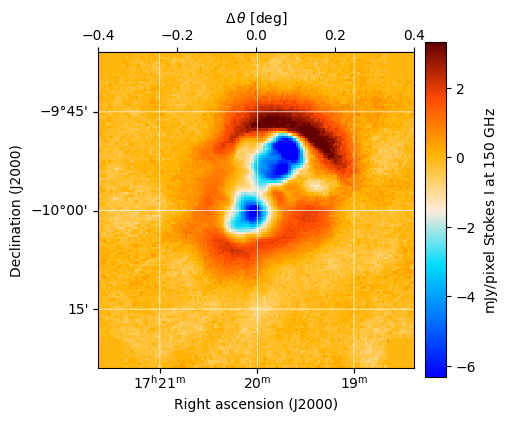

In [9]:
ml_mapper.map.plot(cmap="cmb")

that will improve more as it continues to fit.